In [6]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [8]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1650


In [9]:
print('pytorch_version', torch.__version__, 'DEVICE', DEVICE)

pytorch_version 1.12.0 DEVICE cuda


In [10]:
BATCH_SIZE = 32
EPOCHS = 10

In [13]:
from random import shuffle
from re import L


train_dataset = datasets.MNIST(root='../../data/MNIST/',
train=True,
download=True,
transform= transforms.ToTensor())

test_dataset = datasets.MNIST(root='../../data/MNIST/',
train=False,
download=True,
transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
shuffle=True,
batch_size =  BATCH_SIZE)

test_loader = torch.utils.data.DataLoader(test_dataset,
shuffle=False,
batch_size=BATCH_SIZE)

In [24]:
for (X_train, y_train) in train_loader:
    print('X_train: ', X_train.size(), 'y_train: ', y_train.size())
    print('X_train: ', X_train.type(), 'y_train: ', y_train.type())
    break

X_train:  torch.Size([32, 1, 28, 28]) y_train:  torch.Size([32])
X_train:  torch.FloatTensor y_train:  torch.LongTensor


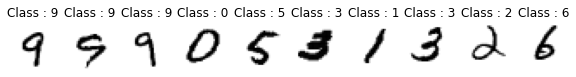

In [26]:
pltsize = 1
plt.figure(figsize=(pltsize*10, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class : ' + str(y_train[i].item()))

In [34]:
class Net(nn.Module) :
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3= nn.Linear(256, 10)

    def forward(self, x):
        x= x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

In [51]:
model= Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.5)
criterion = torch.nn.CrossEntropyLoss()
print(model) 

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [52]:
def train(model, train_loader, optimizer, log_intervals=100):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image=  image.to(DEVICE)
        label = label.to(DEVICE)
        output = model(image)
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_intervals == 0:
            print(f'Train_EPOCH: {Epoch}, [{batch_idx*len(image)} / {len(train_loader.dataset)} ({(100. * batch_idx / len(train_loader)):.0f}%)]\tTrain_Loss: {(loss.item()):.6f}')


In [53]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [54]:
from inspect import Parameter


EPOCHS = 30
best_accuracy = 0

for Epoch in range(1, EPOCHS +1) :
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f'\n[EPOCH: {Epoch}, \tTest_LOSS: {(test_loss):.4f}, \tTest_Accuracy: {(test_accuracy):.2f} %\n')

    if test_accuracy > best_accuracy:
        best_accuracy  = test_accuracy
        best_model = model

print('최고성능: ', f'{(best_accuracy):.2f}')

C:\Users\Admin\AppData\Local\Temp\ipykernel_948\3992098958.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train_EPOCH: 1, [0 / 60000 (0%)]	Train_Loss: 2.299237
Train_EPOCH: 1, [3200 / 60000 (5%)]	Train_Loss: 2.179500
Train_EPOCH: 1, [6400 / 60000 (11%)]	Train_Loss: 1.862375
Train_EPOCH: 1, [9600 / 60000 (16%)]	Train_Loss: 1.401824
Train_EPOCH: 1, [12800 / 60000 (21%)]	Train_Loss: 1.028384
Train_EPOCH: 1, [16000 / 60000 (27%)]	Train_Loss: 0.726917
Train_EPOCH: 1, [19200 / 60000 (32%)]	Train_Loss: 0.653155
Train_EPOCH: 1, [22400 / 60000 (37%)]	Train_Loss: 0.304516
Train_EPOCH: 1, [25600 / 60000 (43%)]	Train_Loss: 0.477564
Train_EPOCH: 1, [28800 / 60000 (48%)]	Train_Loss: 0.405445
Train_EPOCH: 1, [32000 / 60000 (53%)]	Train_Loss: 0.125255
Train_EPOCH: 1, [35200 / 60000 (59%)]	Train_Loss: 0.509135
Train_EPOCH: 1, [38400 / 60000 (64%)]	Train_Loss: 0.154821
Train_EPOCH: 1, [41600 / 60000 (69%)]	Train_Loss: 0.545102
Train_EPOCH: 1, [44800 / 60000 (75%)]	Train_Loss: 0.302622
Train_EPOCH: 1, [48000 / 60000 (80%)]	Train_Loss: 0.313050
Train_EPOCH: 1, [51200 / 60000 (85%)]	Train_Loss: 0.565504
Train_

In [50]:
del model